Time steps
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132]
No.of timesteps= 45
[datetime.datetime(2020, 5, 16, 0, 0), datetime.datetime(2020, 5, 16, 3, 0), datetime.datetime(2020, 5, 16, 6, 0), datetime.datetime(2020, 5, 16, 9, 0), datetime.datetime(2020, 5, 16, 12, 0), datetime.datetime(2020, 5, 16, 15, 0), datetime.datetime(2020, 5, 16, 18, 0), datetime.datetime(2020, 5, 16, 21, 0), datetime.datetime(2020, 5, 17, 0, 0), datetime.datetime(2020, 5, 17, 3, 0), datetime.datetime(2020, 5, 17, 6, 0), datetime.datetime(2020, 5, 17, 9, 0), datetime.datetime(2020, 5, 17, 12, 0), datetime.datetime(2020, 5, 17, 15, 0), datetime.datetime(2020, 5, 17, 18, 0), datetime.datetime(2020, 5, 17, 21, 0), datetime.datetime(2020, 5, 18, 0, 0), datetime.datetime(2020, 5, 18, 3, 0), datetime.datetime(2020, 5, 18, 6, 0), datetime.datetime(2020, 5, 18, 9, 0), datetime.datetim

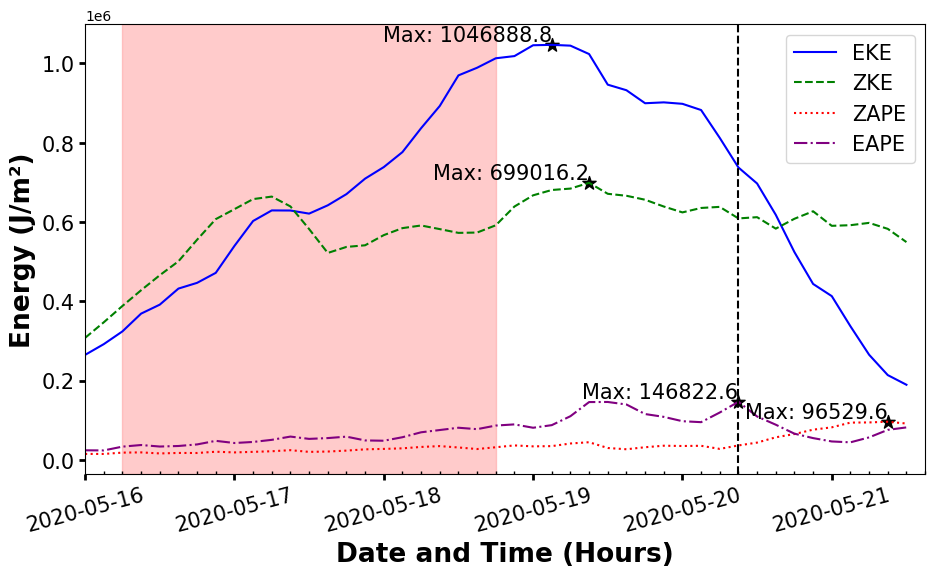

In [2]:
#For running the code for different cyclones ,
#you need to change the storm location,name of cyclone in dataset,and star_date and end_date in the code
#For shading the ri period you need to change the ri_start_date and ri_end_date
#For quasi lagrangian change the base time to start time of the cyclone
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

path = '/DISK-0/gokul/ENGY/'
storm = 'data/amphan_3_q/'

# Open the NetCDF file
dataset = nc.Dataset(path+storm+'amphan_3_q.nc', 'r')

# Extract Time Data
time = dataset.variables['time'][:]
print("Time steps")
print(time)
print(f"No.of timesteps= {len(time)}")
time_units = dataset.variables['time'].units
calendar = time.calendar if hasattr(time, 'calendar') else 'standard'
# Convert time values to datetime objects
base_time = datetime(2020,5,16)
date_values = [base_time + timedelta(hours=float(t)) for t in time]


print(date_values)
print(len(date_values))
print(f"Base time  = {base_time}")

# Read Data from .txt File
with open(path+storm+'/eke.txt', 'r') as file:
    txt_data1 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/zke.txt', 'r') as file:
    txt_data2 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/zape.txt', 'r') as file:
    txt_data3 = [float(line.strip()) for line in file.readlines()]
with open(path+storm+'/eape.txt', 'r') as file:
    txt_data4 = [float(line.strip()) for line in file.readlines()]
# Assuming date_values contains datetime objects
start_date = datetime(2020,5,16)
end_date = datetime(2020,5,21,12)
# Extend the end_date by 3 hours
end_date_extended = end_date + timedelta(hours=3)


ri_start_date =datetime(2020,5,16,6)
ri_end_date = datetime(2020,5,18,18)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2020,5,20,9)
# Find the indices corresponding to start_date and end_date
start_index = date_values.index(start_date)
end_index = date_values.index(end_date)

# Plot the variables
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
plt.xlim(start_date, end_date_extended)
# Add a shaded region
plt.axvspan(ri_start_date, ri_end_date, alpha= 0.5, color='#FF9999')  # Adjust color and alpha as needed
# Increase x and y-axis tick label sizes
plt.xticks(fontsize=15)
# Set y-axis in scientific notation with an exponent of 10^3
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# Access the y-axis tick labels
y_formatter = plt.gca().get_yaxis().get_major_formatter()

# Adjust the global font size of the plot (including exponent part)
plt.rc('font', size=15)
plt.yticks(fontsize=15)


# Create the Plot
# Plot variable1 with blue color and solid line
plt.plot(date_values[start_index:end_index+1], txt_data1[start_index:end_index+1], label='EKE', color='blue', linestyle='-')
# Plot variable2 with green color and dashed line
plt.plot(date_values[start_index:end_index+1], txt_data2[start_index:end_index+1], label='ZKE', color='green', linestyle='--')
# Plot variable3 with red color and dotted line
plt.plot(date_values[start_index:end_index+1], txt_data3[start_index:end_index+1], label='ZAPE', color='red', linestyle=':')
# Plot variable4 with purple color and dash-dot line
plt.plot(date_values[start_index:end_index+1], txt_data4[start_index:end_index+1], label='EAPE', color='purple', linestyle='-.')


# Add labels and title
plt.xlabel('Date and Time (Hours)', fontdict={'fontsize': 19, 'fontweight': 'bold'})
plt.ylabel('Energy (J/m²)', fontdict={'fontsize': 19, 'fontweight': 'bold'})

# Add legend
plt.legend(prop={'weight':'bold'})
plt.legend(fontsize=15)
# Find maximum values and their indices
max_values = [max(txt_data1), max(txt_data2), max(txt_data3), max(txt_data4)]
max_indices = [txt_data1.index(max_values[0]), txt_data2.index(max_values[1]), txt_data3.index(max_values[2]), txt_data4.index(max_values[3])]
max_values_rounded = [round(value, 1) for value in max_values]

# Add a vertical dashed line at landfall time
plt.axvline(landfall_date, color='black', linestyle='--') 
# Label maximum values
for i, value in enumerate(max_values_rounded):
    if i == 2 :  # Adjust the position for variable2
        plt.text(date_values[max_indices[i]], value, f'Max: {value}', ha='right', va='bottom', color='black', fontsize=15)
        plt.scatter(date_values[max_indices[i]], value, marker='*', color='black', s=100)  # 's' is the marker size
    else:
        plt.text(date_values[max_indices[i]], value, f'Max: {value}', ha='right', va='bottom', color='black', fontsize=15)
        plt.scatter(date_values[max_indices[i]], value, marker='*', color='black', s=100)  # 's' is the marker size
# Increase thickness of major ticks
plt.tick_params(axis='x', which='major', width=2,length=4,rotation=15)
plt.tick_params(axis='y', which='major', width=2,length=4)
plt.tick_params(axis='x', which='minor', width=1, length=2, direction='in')
# Set the minor locator to AutoMinorLocator for 8 minor ticks between majors
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(8))
#plt.show()
# Adjust Margins
plt.subplots_adjust(left=0.1, right=0.94, top=.95, bottom=0.2)
# Save the plot to a desired location
plt.savefig(path+storm+storm[4:-1]+'_energy_plot.png',dpi =300)

# Close the NetCDF file
dataset.close()









In [ ]:
#Amphan
# Assuming date_values contains datetime objects
start_date = datetime(2020,5,16)
end_date = datetime(2020,5,21,12)

ri_start_date =datetime(2020,5,16,6)
ri_end_date = datetime(2020,5,18,18)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2020,5,20,9)
#Phailin
# Assuming date_values contains datetime objects
start_date = datetime(2013,10,8,3)
end_date = datetime(2013,10,14,6)

ri_start_date =datetime(2013,10,9,6)
ri_end_date = datetime(2013,10,11,12)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2013,10,12,15)
#Fani
# Assuming date_values contains datetime objects
start_date = datetime(2019,4,26,3)
end_date = datetime(2019,5,4,12)

ri_start_date =datetime(2019,4,29)
ri_end_date = datetime(2019,4,30,18)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2019,4,30,18)

#Giri
# Assuming date_values contains datetime objects
start_date = datetime(2010,10,20,12)
end_date = datetime(2010,10,23,6)

ri_start_date =datetime(2010,10,20,12)
ri_end_date = datetime(2010,10,22,12)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2010,10,22,12)
#Madi
# Assuming date_values contains datetime objects
start_date = datetime(2013,12,6,3)
end_date = datetime(2013,12,12,18)

ri_start_date =datetime(2013,12,6,3)
ri_end_date = datetime(2013,12,7,8)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2013,12,12,12)
#Hudhud
# Assuming date_values contains datetime objects
start_date = datetime(2014,10,7,3)
end_date = datetime(2014,10,14,9)

ri_start_date =datetime(2014,10,10,6)
ri_end_date = datetime(2014,10,11,6)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2014,10,12,6)
#Titli
# Assuming date_values contains datetime objects
start_date = datetime(2018,10,8,3)
end_date = datetime(2018,10,12,21)

ri_start_date =datetime(2018,10,9,3)
ri_end_date = datetime(2018,10,10,21)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2018,10,10,21)
#Bulbul
# Assuming date_values contains datetime objects
start_date = datetime(2019,11,5,0)
end_date = datetime(2019,11,11,0)

ri_start_date =datetime(2019,11,7,0)
ri_end_date = datetime(2019,11,8,12)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2019,11,9,15)
#Mocha
# Assuming date_values contains datetime objects
start_date = datetime(2023,5,9,12)
end_date = datetime(2023,5,15)

ri_start_date =datetime(2023,5,10,18)
ri_end_date = datetime(2023,5,13,15)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2023,5,14,6)
#Mala
# Assuming date_values contains datetime objects
start_date = datetime(2006,4,25,3)
end_date = datetime(2006,4,29,18)

ri_start_date =datetime(2006,4,27,6)
ri_end_date = datetime(2006,4,29,0)
# landfall_date is the datetime object representing the landfall time
landfall_date = datetime(2006,4,29,6)